## 3 Application of quantiative descriptive statistics 

### 3.1 Creating a 30-yr climatology (temperature climate graph)

We continue our work with the data file that contains daily temperature data observed at Albany Airport (KALB):

*USW00014735_temp_1950-2021_daily.csv*. 

Make sure you know where it is located in your folder system. You may have to update the local path string in the code cell (see variable _local_path_)

 


In [47]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# Import the new package Pandas
import pandas as pd

# Tip: You can change the style of the plots by choosing from 
# the matplotlib styles. 
# More help can be found through a quick google search
from matplotlib import style 
style.use('ggplot') #'classic' 


### 3.2 Reading the data and creating a dataframe object

Many Python coders use in their code a variable name such as _df_ when they work with a dataframe object. We apply the Pandas function _read_csv()_  to read the data table from the csv file and assign it to the variable df.

In [48]:
local_path='../data/'
filename=local_path+'USW00014735_temp_1950-2021_daily.csv'
df=pd.read_csv(filename,delimiter=',',skiprows=0)

In [49]:
df

,time,year,month,day,avgt,mint,maxt
0,1950-01-01,1950.0,1.0,1.0,29.5,22.0,37.0
1,1950-01-02,1950.0,1.0,2.0,35.5,32.0,39.0
2,1950-01-03,1950.0,1.0,3.0,46.5,38.0,55.0
3,1950-01-04,1950.0,1.0,4.0,59.5,55.0,64.0
4,1950-01-05,1950.0,1.0,5.0,49.5,35.0,64.0
...,...,...,...,...,...,...,...
26293,2021-12-27,2021.0,12.0,27.0,30.0,26.0,34.0
26294,2021-12-28,2021.0,12.0,28.0,38.5,31.0,46.0
26295,2021-12-29,2021.0,12.0,29.0,35.5,33.0,38.0
26296,2021-12-30,2021.0,12.0,30.0,39.5,35.0,44.0


<p style="color:gold;background-color:purple;font-size:130%">
    <BR>Task 3.3: Standard statistics for quantitative data samples<BR><BR>

</p>

#### 3.3.1 Select (subsample the data): climate norm period 1981-2010
        
In this exercise we make use of the dataframe df and the query function to get the data samples for the period 1981-2010. 
###### (Note: NOAA updated their climate norm period to 1991-2020. Both periods are okay to use here in this exercise.)

- Start working with the dataframe in variable _df_ and apply the query method to select the years 1981-2010 (_df.query()_) 
        
- Assign the result to a new variable (e.g. 'dfclim')

In [50]:
# get all the data from that fall into the 30 year climate norm period
dfclim=df.query("year >=1981 and year <= 2010")
dfclim

,time,year,month,day,avgt,mint,maxt
11323,1981-01-01,1981.0,1.0,1.0,11.0,1.0,21.0
11324,1981-01-02,1981.0,1.0,2.0,14.0,1.0,27.0
11325,1981-01-03,1981.0,1.0,3.0,1.5,-4.0,7.0
11326,1981-01-04,1981.0,1.0,4.0,-7.5,-13.0,-2.0
11327,1981-01-05,1981.0,1.0,5.0,5.0,-9.0,19.0
...,...,...,...,...,...,...,...
22275,2010-12-27,2010.0,12.0,27.0,17.0,14.0,20.0
22276,2010-12-28,2010.0,12.0,28.0,24.0,15.0,33.0
22277,2010-12-29,2010.0,12.0,29.0,31.5,29.0,34.0
22278,2010-12-30,2010.0,12.0,30.0,24.5,15.0,34.0


### 3.3.2 Select (subsample the data): month January
        
Remember that we have to use the numerical values 1.0 to search for the rows 
that belong to a day in month January.

- Start working with the dataframe in variable _dfclim_ and apply the query method to select month (_df.query()_) 
        
- Assign the result to a new variable (e.g. '_dfjan_' or '_dfhelp_')

In [51]:
dfjan=dfclim.query("month == 1.0")


### 3.3.3 Statistical calculations

We have extracted (subsampled) the data to the year range 1981-2010, and selected a single month (January). Now, calculate the following statistical values:

- mean
- median
- minimum
- maximum
- standard deviation
- variance


(See Reading assignment, there you'll find more information on the definition of these statistical properties)

We have several options how to do that. One option is that we go back to the functions that the numpy package provides to us. The advantage of working with the numpy functions is that you can later use the learned methods for all sorts of data.

The second option is that we apply Pandas methods. 


#### (A) The Numpy method

We can convert the data columns into numpy arrays. 
Once we have done that you can apply the following numpy functions:

- _np.mean()_ 
- _np.std()_
- _np.min()_
- _np.max()_
        
Note, that these functions don't do well when np.nan values are in your data arrays.You can use related functions named _np.nanmean()_  etc., instead. 



In [52]:
m1=np.mean(dfjan['avgt'])
print("Mean January daily mean temperature is " + 
      str(round(m1,2))+" deg F")
print(f"Mean January daily mean temperature is { m1 } deg F")

Mean January daily mean temperature is 22.8 deg F
Mean January daily mean temperature is 22.8 deg F


#### (B) Direct calculation using the Pandas dataframe method


In [53]:
mtest=np.mean(dfjan['avgt'].values)
print(mtest)

22.8


In [54]:
# getting a loop over all month
avgtlist=[]
monthlist=[]
smonth=['Jan', 'Feb', 'Mar', 'Apr',
        'May', 'Jun', 'Jul', 'Aug',
        'Sep', 'Oct', 'Nov','Dec' ]
for m in range(12): 
    print(f"month  == {m+1}.0  month {smonth[m]} ")
    result=dfclim.query(f"month  == {m+1}.0")
    mavgt=result['avgt'].mean()
    print(f" temp mean : {mavgt:.2f} deg F")
    avgtlist.append(mavgt)
    monthlist.append(m+1)


month  == 1.0  month Jan 
 temp mean : 22.80 deg F
month  == 2.0  month Feb 
 temp mean : 26.13 deg F
month  == 3.0  month Mar 
 temp mean : 35.08 deg F
month  == 4.0  month Apr 
 temp mean : 47.71 deg F
month  == 5.0  month May 
 temp mean : 58.23 deg F
month  == 6.0  month Jun 
 temp mean : 67.12 deg F
month  == 7.0  month Jul 
 temp mean : 71.66 deg F
month  == 8.0  month Aug 
 temp mean : 70.07 deg F
month  == 9.0  month Sep 
 temp mean : 61.88 deg F
month  == 10.0  month Oct 
 temp mean : 49.82 deg F
month  == 11.0  month Nov 
 temp mean : 39.95 deg F
month  == 12.0  month Dec 
 temp mean : 28.62 deg F


In [56]:
avgtlist

[22.8,
 26.132231404958677,
 35.075268817204304,
 47.70944444444444,
 58.23225806451613,
 67.125,
 71.66182795698924,
 70.06881720430107,
 61.88444444444445,
 49.821505376344085,
 39.95166666666667,
 28.620430107526882]

#### Calculate the other statistical parameters and assign them to variables. Use print function calls to summarize the results.




In [57]:
# getting a loop over all month
# calculate standard deviation
squirrel=np.zeros(shape=[12,2])

smonth=['Jan', 'Feb', 'Mar', 'Apr',
        'May', 'Jun', 'Jul', 'Aug',
        'Sep', 'Oct', 'Nov','Dec' ]
for m in range(12): 
    print(f"month  == {m+1}.0  month {smonth[m]} ")
    result=dfclim.query(f"month  == {m+1}.0")
    beaver=np.mean(result['avgt'])
    chipmunk=np.std(result['avgt'])
    print(f" temp  mean, stddev : {beaver:.2f}, {chipmunk:.2f} deg F")
    squirrel[m,0]=beaver
    squirrel[m,1]=chipmunk

month  == 1.0  month Jan 
 temp  mean, stddev : 22.80, 11.70 deg F
month  == 2.0  month Feb 
 temp  mean, stddev : 26.13, 10.05 deg F
month  == 3.0  month Mar 
 temp  mean, stddev : 35.08, 10.06 deg F
month  == 4.0  month Apr 
 temp  mean, stddev : 47.71, 8.68 deg F
month  == 5.0  month May 
 temp  mean, stddev : 58.23, 7.51 deg F
month  == 6.0  month Jun 
 temp  mean, stddev : 67.12, 6.51 deg F
month  == 7.0  month Jul 
 temp  mean, stddev : 71.66, 5.30 deg F
month  == 8.0  month Aug 
 temp  mean, stddev : 70.07, 5.84 deg F
month  == 9.0  month Sep 
 temp  mean, stddev : 61.88, 7.17 deg F
month  == 10.0  month Oct 
 temp  mean, stddev : 49.82, 7.82 deg F
month  == 11.0  month Nov 
 temp  mean, stddev : 39.95, 8.58 deg F
month  == 12.0  month Dec 
 temp  mean, stddev : 28.62, 9.65 deg F


In [58]:
squirrel

array([[22.8       , 11.69823532],
       [26.1322314 , 10.04556855],
       [35.07526882, 10.06480246],
       [47.70944444,  8.67501327],
       [58.23225806,  7.51037506],
       [67.125     ,  6.5052703 ],
       [71.66182796,  5.29656968],
       [70.0688172 ,  5.84196863],
       [61.88444444,  7.16899049],
       [49.82150538,  7.82406474],
       [39.95166667,  8.57779093],
       [28.62043011,  9.6534863 ]])

### 3.4 Creating a climate graph for the climate norm period.

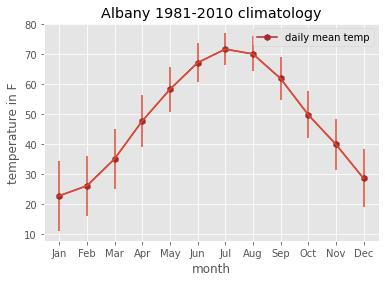

In [60]:
plt.plot(monthlist,squirrel[:,0],'h-',color='brown',label='daily mean temp')
plt.errorbar(monthlist,squirrel[:,0],squirrel[:,1])
plt.title("Albany 1981-2010 climatology")
plt.xlabel("month")
plt.ylabel("temperature in F")
plt.xticks(monthlist,smonth)
plt.legend()
plt.show()

### Exporting our numerical results into a CSV file

We can save the result of the monthly mean climatology calculation in CSV
formatted files, so that we can share the data, and work with the also in Excel spreadsheets for further analysis / additional plotting.

Steps:

- 1. create a new Pandas dataframe with data columns
- 2. use the Pandas dataframe method ___to_csv()___ to save the data in a file



In [70]:
# Option 1:
# start  with an empty dataframe
# and fill in the data columns
dfnew= pd.DataFrame()
dfnew['month']=smonth
dfnew['mean']=squirrel[:,0]
dfnew['std']=squirrel[:,1]
dfnew['note']='Albany daily mean temp 1981-2010'

In [67]:
# export the data to a CSV file
dfnew.to_csv("alb_avgt_clim_1981-2010.csv")


In [69]:
# Option 2 for creating a dataframe with columns of data
# collect all data first in a dictionary
# then create a dataframe from the dictionary
storage= {'month':smonth,'mean':squirrel[:,0],'std':squirrel[:,1]} 
dfsummary=pd.DataFrame(storage)
dfsummary

,month,mean,std
0,Jan,22.800000,11.698235
1,Feb,26.132231,10.045569
2,Mar,35.075269,10.064802
3,Apr,47.709444,8.675013
4,May,58.232258,7.510375
5,Jun,67.125000,6.505270
6,Jul,71.661828,5.296570
7,Aug,70.068817,5.841969
8,Sep,61.884444,7.168990
9,Oct,49.821505,7.824065


---
### Optional code solution (for advanced Python coders):

---
### References:

John Townend “[Practical Statistics for Environmental and Biological Scientists](https://www.wiley.com/en-us/Practical+Statistics+for+Environmental+and+Biological+Scientists-p-9780471496656)” (hereafter “PracStat”)

    Chapter 1: 1.1, 1.2, 1.5
    Chapter 2: 2.1-2.4
    Chapter 5: 5.1-5.7

E-book: [Collaborative Statistics](https://open.umn.edu/opentextbooks/textbooks/11) by Barbara Illowsky and Susan Dean

    Chapter 1: 1.1, 1.3, 1.4, 1.6
    Chapter 2: 2.1-2.9

---
### Appendix:


#### A1) A climate graph for Albany NY (for comparison)
    

In [60]:
#To give you an example graph:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://www.albany-ny.climatemps.com/albany-ny-climate-graph.gif", width=600)

---


### A2) Creating a Dictionary 
#### (using key-value pairs)
We illustrated in class the structure of the data type ___dictionary___


In [59]:
# create a dictionary with sytax { key1:value1, key2:value2 }
dmonth= {'Jan':1, 'Feb':2, 'Mar':3}
# use the key to look up the corresponding data value
print(dmonth['Mar'])
# add more key-value pairs to dictionary
dmonth['Dec']=12
dmonth['Aug']="August tavg 1981-2010"
print("value assoicated with key 'Dec' is:" , dmonth['Aug'])
# get all keys returned as a list (similar to list object) 
print("All keys in my dictionary:")
print(dmonth.keys())
print(dmonth.values())


3
value assoicated with key 'Dec' is: August tavg 1981-2010
All keys in my dictionary:
dict_keys(['Jan', 'Feb', 'Mar', 'Dec', 'Aug'])
dict_values([1, 2, 3, 12, 'August tavg 1981-2010'])
